In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
%matplotlib inline
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
from skimage.segmentation import quickshift as qs


In [29]:
img = cv2.imread('tesla.jpg')
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
Z = np.float32(img.reshape((-1,3)))

# K Mean Segmentation

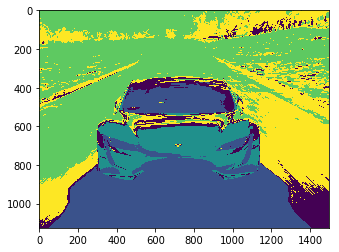

In [30]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret, label, center = cv2.kmeans(Z, 5, None, criteria, 6, cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make the original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = np.uint8(label.reshape(img.shape[:2]))
res2.shape
plt.imshow(res2)
plt.show()

# Mean Shift Segmentation

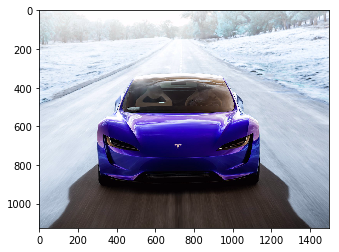

In [31]:
img_meanshift = cv2.pyrMeanShiftFiltering(img, 20, 30, 2)
img_RGB = cv2.cvtColor(img_meanshift, cv2.COLOR_HSV2RGB)
plt.imshow(img)
plt.show()

# GraphCut Segmentation

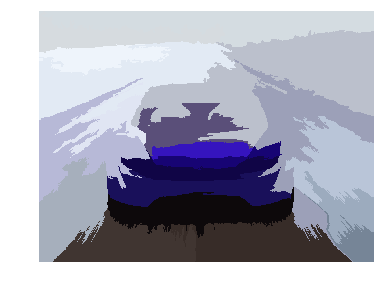

In [32]:
labels1 = segmentation.slic(img, compactness=1, n_segments=40)
out1 = color.label2rgb(labels1, img, kind='avg')
g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg')
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(6, 8))
ax.imshow(out1)
ax.axis('off')
plt.show()

# Water segment Segmentation

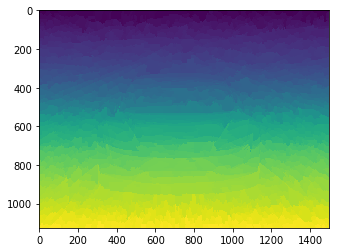

In [33]:
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = qs(img_RGB, convert2lab=True)
plt.imshow(img)
plt.show()

# DBSCAN Segmentation

In [ ]:
db = DBSCAN(eps=0.3, min_samples=100).fit(Z[:,:2])
plt.imshow(np.uint8(db.labels_.reshape(img.shape[:2])))
plt.show()